# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# Reading in Data

In [7]:
df = pd.read_csv('./DATA/total_tox_data.csv')

In [9]:
df.head()

,Unnamed: 0,mol_id,smiles,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
0,0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,...,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
2,2,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
3,3,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
4,4,TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = df.drop('Unnamed: 0', axis=1)

In [11]:
df.set_index('mol_id', inplace=True)
df.head()

,smiles,MolecularWeight,LogP,TPSA,HBDonors,HBAcceptors,RotatableBonds,FractionCSP3,HeavyAtoms,RingCount,...,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53
mol_id,,,,,,,,,,,,,,,,,,,,,
TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1,258.324,1.34240,82.28,1.0,5.0,3.0,0.222222,16.0,2.0,...,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O,204.229,1.29940,49.41,1.0,2.0,2.0,0.272727,15.0,2.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...,288.475,5.09030,20.23,1.0,1.0,1.0,0.900000,21.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C,276.424,3.75244,32.34,1.0,2.0,7.0,0.588235,20.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0
TOX20800,CC(O)(P(=O)(O)O)P(=O)(O)O,206.027,-0.99220,135.29,5.0,3.0,2.0,1.000000,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df.columns

Index(['smiles', 'MolecularWeight', 'LogP', 'TPSA', 'HBDonors', 'HBAcceptors',
       'RotatableBonds', 'FractionCSP3', 'HeavyAtoms', 'RingCount',
       'AromaticProportion', 'LogS_ESOL', 'PositiveCharges', 'NegativeCharges',
       'FormalCharge', 'AromaticRings', 'AromaticHeterocycles',
       'AliphaticRings', 'MolecularComplexity', 'MolarRefractivity',
       'Heteroatoms', 'HalogenCount', 'PhenolicGroups', 'NR-AR', 'NR-AR-LBD',
       'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
       'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'],
      dtype='object')

# Univariate Analysis

### Distribution Analysis using KDE Plots

In [51]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

def plot_kde_with_stats_and_save(column, column_name='Column', figsize=(8,5), bw_adjust=1, save_dir='./Plots/KDEPlots'):
    print("Function started") 
    
    data = pd.Series(column).dropna()
    print("Data cleaned")  

    mean_val = np.mean(data)
    median_val = np.median(data)
    skewness = skew(data)
    kurt_val = kurtosis(data)
    print(f"Stats computed: mean={mean_val}, median={median_val}, skew={skewness}, kurt={kurt_val}")  

    plt.figure(figsize=figsize)
    ax = sns.kdeplot(data, fill=True, bw_adjust=bw_adjust, color='magenta', alpha=0.6, linewidth=2)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.title(f"KDE Plot of {column_name}", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)

    stats_text = '\n'.join([
        f"Mean: {mean_val:.2f}",
        f"Median: {median_val:.2f}",
        f"Skewness: {skewness:.2f}",
        f"Kurtosis: {kurt_val:.2f}"
    ])
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()

    # Make sure the directory exists
    os.makedirs(save_dir, exist_ok=True)
    print(f"Directory ensured: {save_dir}")  

    filename = f"{column_name}_kde_plot.png"
    full_path = os.path.join(save_dir, filename)
    print(f"Saving plot to: {full_path}")  

    plt.savefig(full_path)
    print("Plot saved")  

    plt.show()

Function started
Data cleaned
Stats computed: mean=276.3186517188952, median=240.302, skew=2.5780037355838474, kurt=12.51434522394989
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\Molecular Weight_kde_plot.png
Plot saved


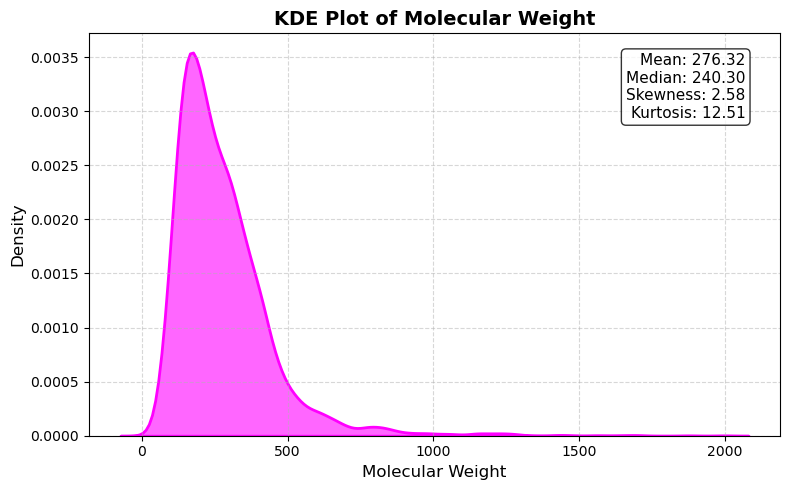

In [59]:
plot_kde_with_stats_and_save(df['MolecularWeight'], column_name='Molecular Weight')

Function started
Data cleaned
Stats computed: mean=2.3656480296258473, median=2.3651, skew=-1.2062941518021852, kurt=24.378951812802253
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\LogP_kde_plot.png
Plot saved


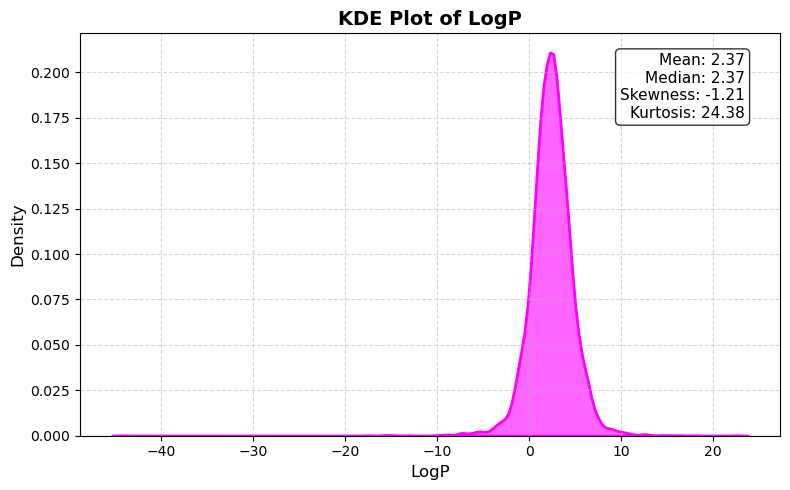

In [60]:
plot_kde_with_stats_and_save(df['LogP'], column_name='LogP')

Function started
Data cleaned
Stats computed: mean=59.616917379645, median=46.53, skew=4.298223735273583, kurt=36.63951908179066
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\TPSA_kde_plot.png
Plot saved


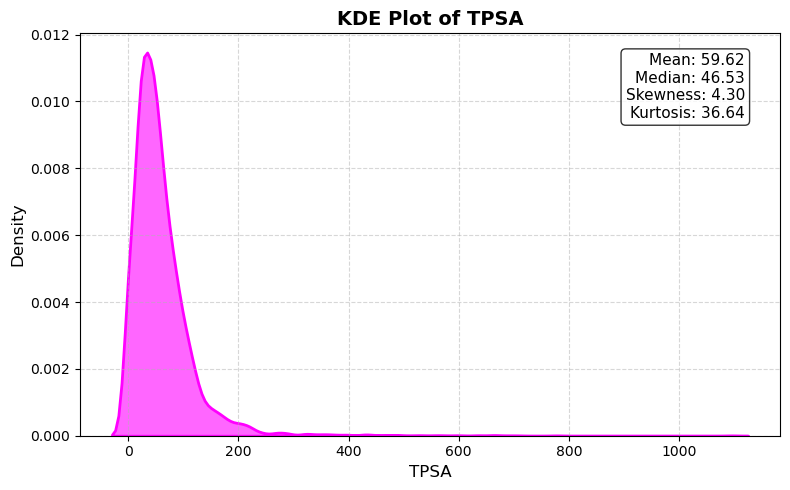

In [61]:
plot_kde_with_stats_and_save(df['TPSA'], column_name='TPSA')

Function started
Data cleaned
Stats computed: mean=1.2290895160260502, median=1.0, skew=5.164339526748393, kurt=46.15686996041119
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\HBDonors_kde_plot.png
Plot saved


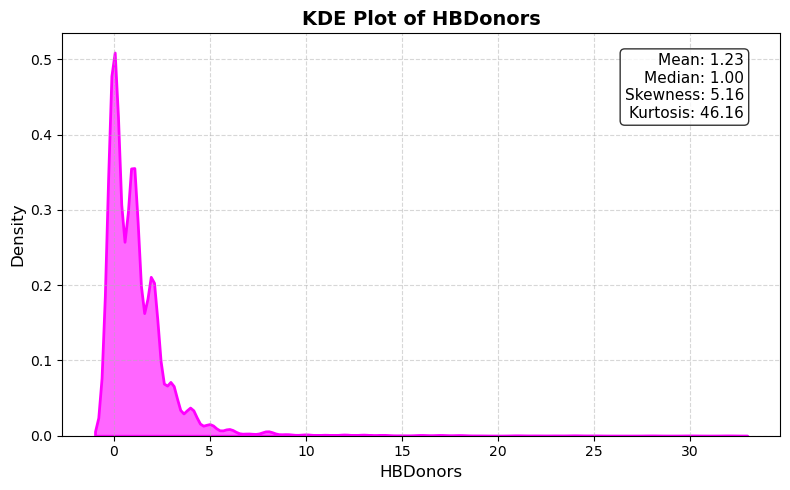

In [62]:
plot_kde_with_stats_and_save(df['HBDonors'], column_name='HBDonors')

Function started
Data cleaned
Stats computed: mean=3.5673604903588303, median=3.0, skew=3.9963108169720196, kurt=37.4420028372291
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\HBAcceptors_kde_plot.png
Plot saved


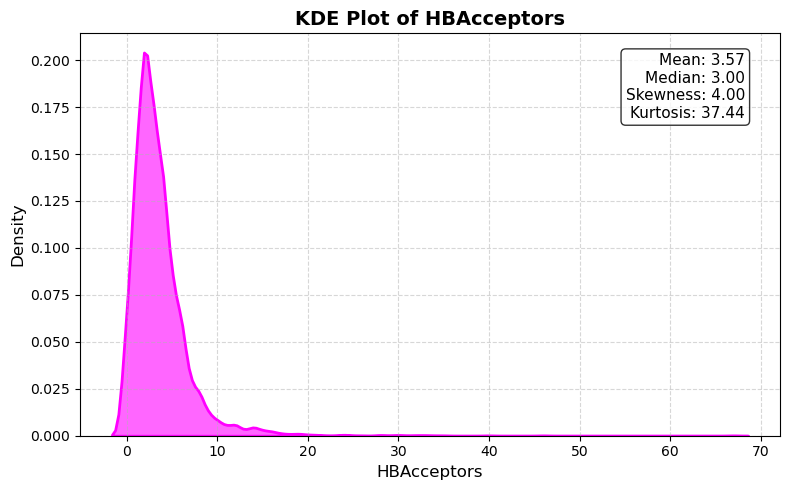

In [63]:
plot_kde_with_stats_and_save(df['HBAcceptors'], column_name='HBAcceptors')

Function started
Data cleaned
Stats computed: mean=0.45867397958694034, median=0.4166666666666667, skew=0.24248576952789982, kurt=-1.118079345653749
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\FractionCSP3_kde_plot.png
Plot saved


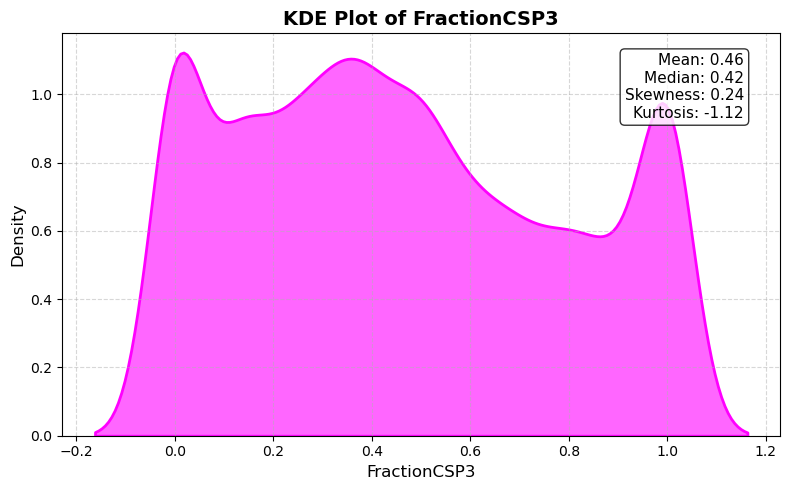

In [65]:
plot_kde_with_stats_and_save(df['FractionCSP3'], column_name='FractionCSP3')

Function started
Data cleaned
Stats computed: mean=4.310177499680756, median=3.0, skew=2.5209249651645393, kurt=10.779452297234236
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\RotatableBonds_kde_plot.png
Plot saved


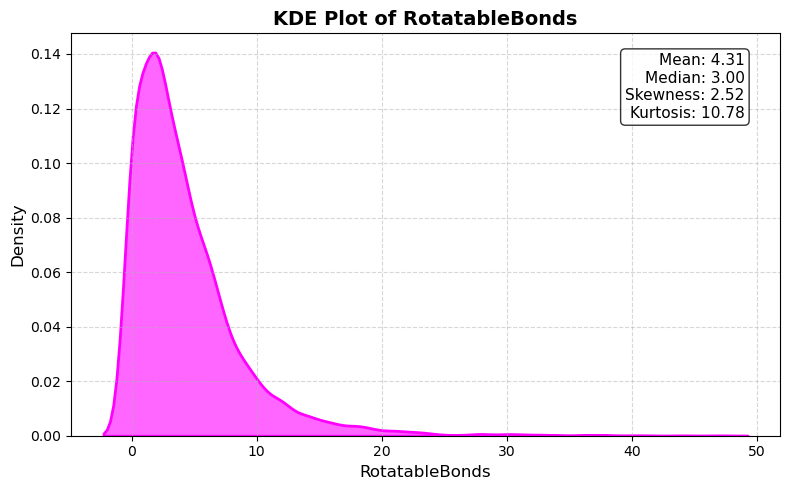

In [66]:
plot_kde_with_stats_and_save(df['RotatableBonds'], column_name='RotatableBonds')

Function started
Data cleaned
Stats computed: mean=18.57387306857362, median=16.0, skew=2.481617603134296, kurt=11.884958198821122
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\HeavyAtoms_kde_plot.png
Plot saved


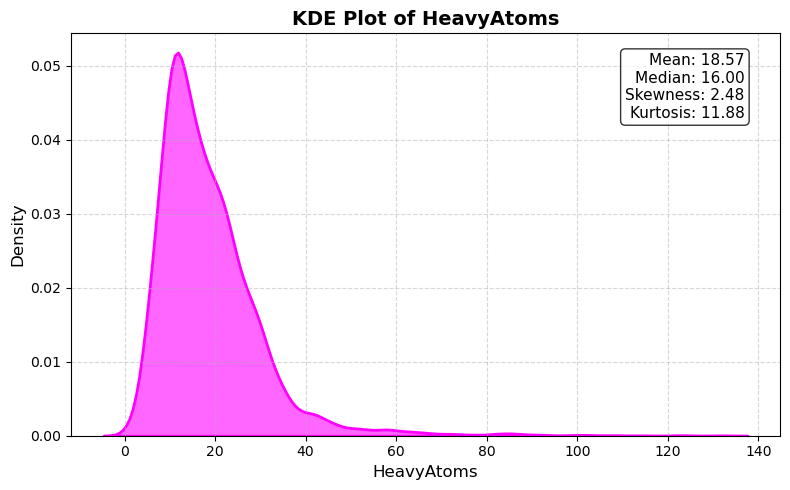

In [67]:
plot_kde_with_stats_and_save(df['HeavyAtoms'], column_name='HeavyAtoms')

Function started
Data cleaned
Stats computed: mean=1.771165879198059, median=1.0, skew=2.2808479889942292, kurt=18.40931623998084
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\RingCount_kde_plot.png
Plot saved


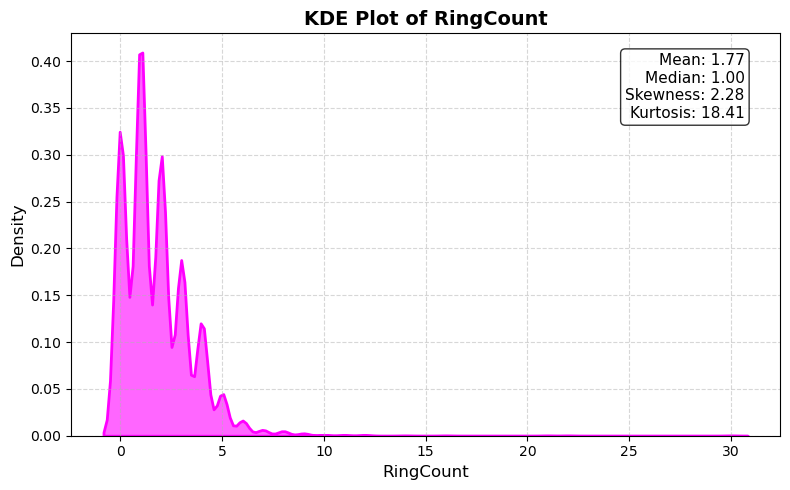

In [68]:
plot_kde_with_stats_and_save(df['RingCount'], column_name='RingCount')

Function started
Data cleaned
Stats computed: mean=0.32597267558002535, median=0.3571428571428571, skew=0.16758697684144083, kurt=-1.192355032584853
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\AromaticProportion_kde_plot.png
Plot saved


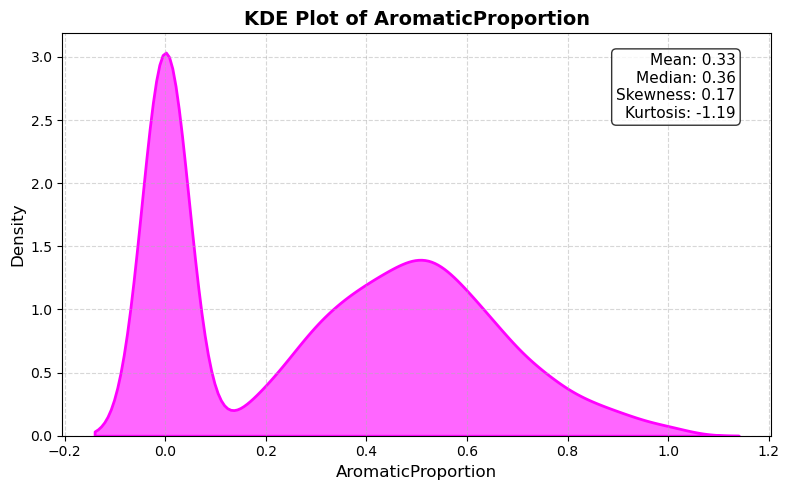

In [69]:
plot_kde_with_stats_and_save(df['AromaticProportion'], column_name='AromaticProportion')

Function started
Data cleaned
Stats computed: mean=-3.0002819642717227, median=-2.875236742857143, skew=-0.4450226372973977, kurt=4.212250704818553
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\LogS_ESOL_kde_plot.png
Plot saved


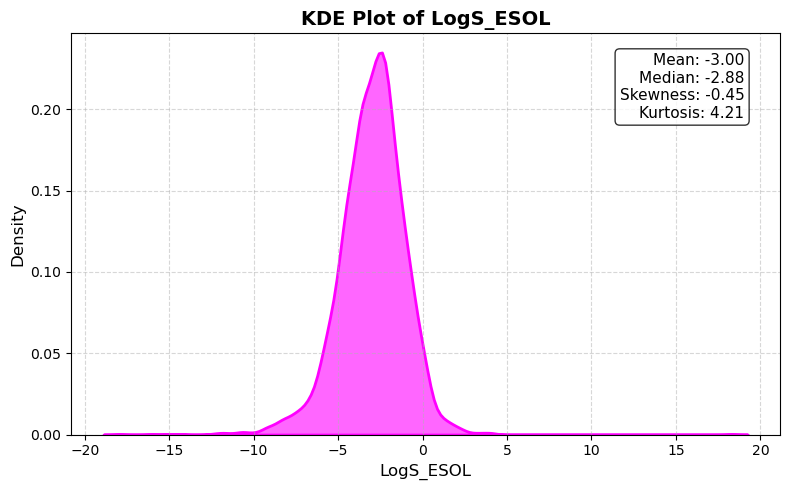

In [70]:
plot_kde_with_stats_and_save(df['LogS_ESOL'], column_name='LogS_ESOL')

Function started
Data cleaned
Stats computed: mean=0.10381815860043417, median=0.0, skew=3.9411372231945827, kurt=18.74075555810122
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\PositiveCharges_kde_plot.png
Plot saved


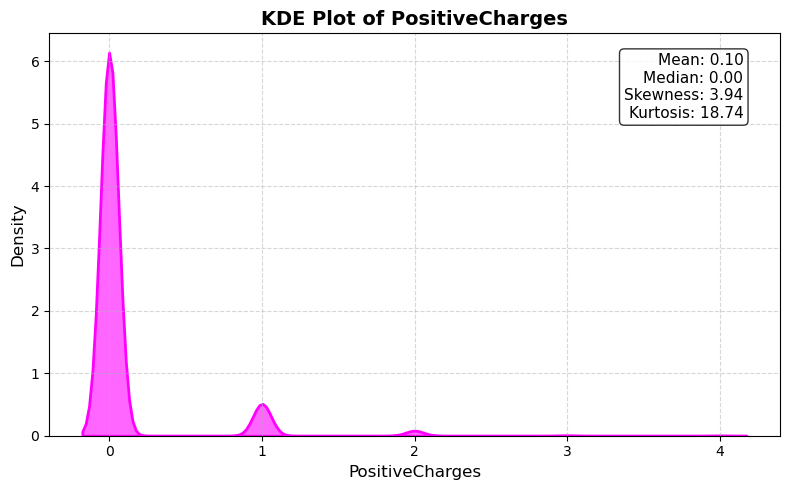

In [71]:
plot_kde_with_stats_and_save(df['PositiveCharges'], column_name='PositiveCharges')

Function started
Data cleaned
Stats computed: mean=0.14251053505299452, median=0.0, skew=3.942625666318625, kurt=19.44236831875363
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\NegativeCharges_kde_plot.png
Plot saved


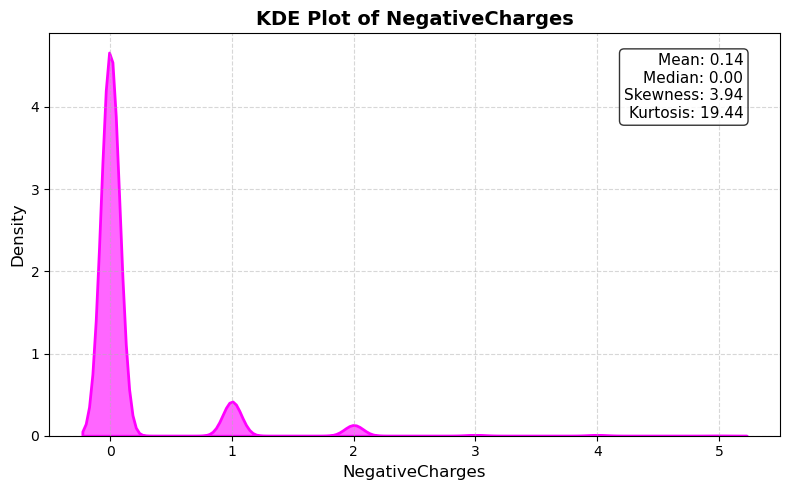

In [72]:
plot_kde_with_stats_and_save(df['NegativeCharges'], column_name='NegativeCharges')

Function started
Data cleaned
Stats computed: mean=-0.03243519346188226, median=0.0, skew=-2.443606384143116, kurt=30.297228481451377
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\FormalCharge_kde_plot.png
Plot saved


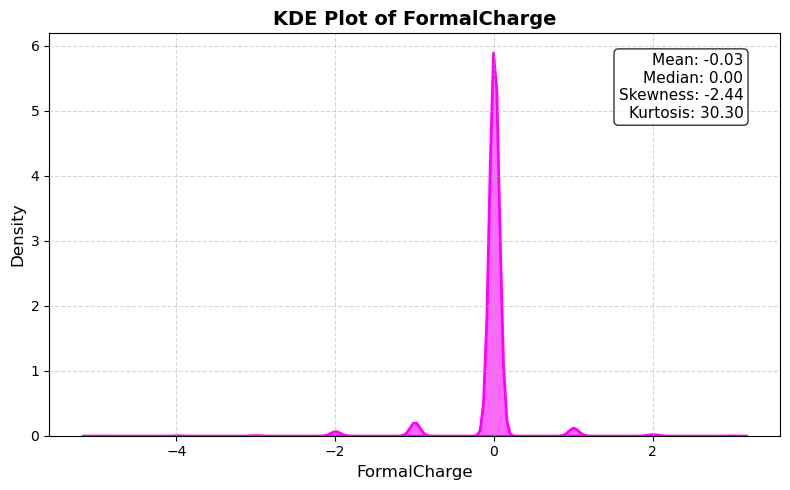

In [73]:
plot_kde_with_stats_and_save(df['FormalCharge'], column_name='FormalCharge')

Function started
Data cleaned
Stats computed: mean=1.1047120418848169, median=1.0, skew=1.2356944638057803, kurt=3.6061788373477306
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\AromaticRings_kde_plot.png
Plot saved


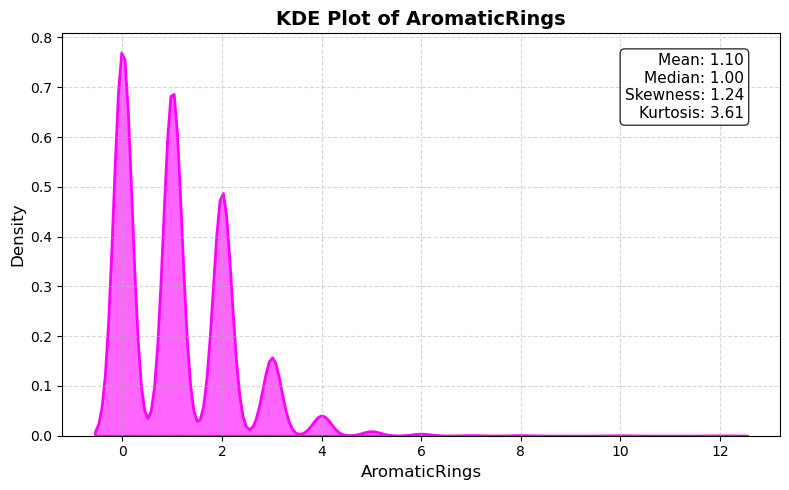

In [74]:
plot_kde_with_stats_and_save(df['AromaticRings'], column_name='AromaticRings')

Function started
Data cleaned
Stats computed: mean=0.2665049163580641, median=0.0, skew=2.3047305359469514, kurt=6.0495248661396115
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\AromaticHeterocycles_kde_plot.png
Plot saved


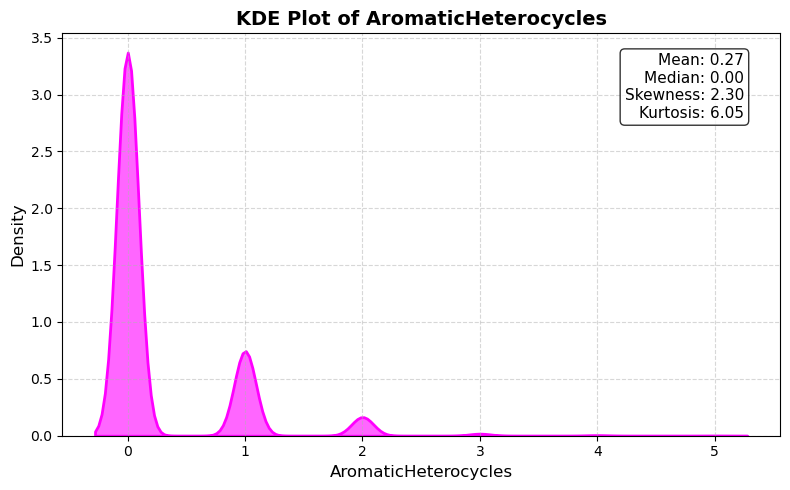

In [75]:
plot_kde_with_stats_and_save(df['AromaticHeterocycles'], column_name='AromaticHeterocycles')

Function started
Data cleaned
Stats computed: mean=0.6707955561231005, median=0.0, skew=4.675346126330628, kurt=57.20034958718607
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\AliphaticRings_kde_plot.png
Plot saved


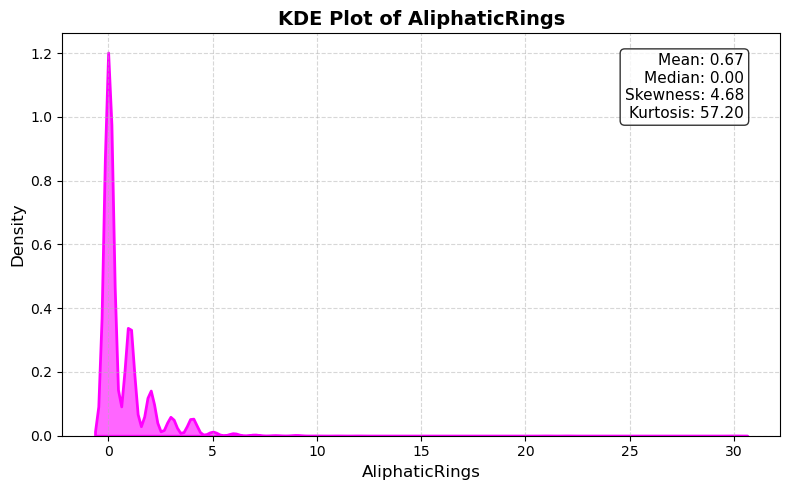

In [76]:
plot_kde_with_stats_and_save(df['AliphaticRings'], column_name='AliphaticRings')

Function started
Data cleaned
Stats computed: mean=1.1281402243998224, median=1.1428571428571428, skew=0.024583948855360256, kurt=-0.04808796240484359
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\MolecularComplexity_kde_plot.png
Plot saved


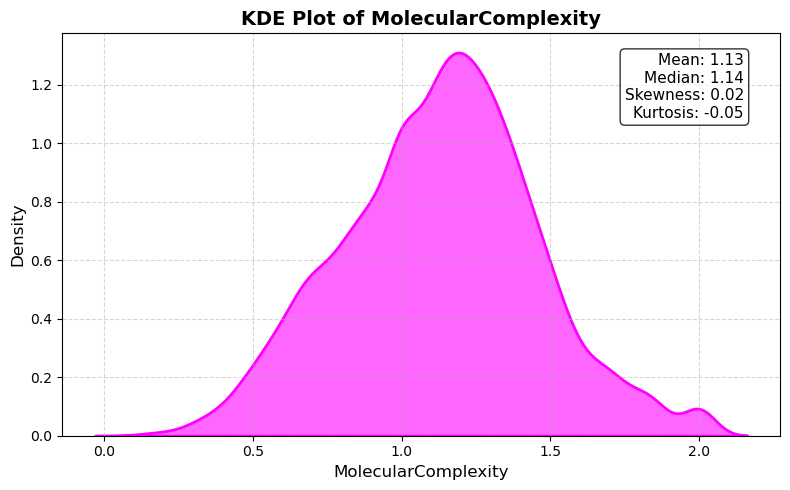

In [77]:
plot_kde_with_stats_and_save(df['MolecularComplexity'], column_name='MolecularComplexity')

Function started
Data cleaned
Stats computed: mean=72.16405917507343, median=63.66830000000004, skew=2.2029394904398742, kurt=9.556320839812942
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\MolarRefractivity_kde_plot.png
Plot saved


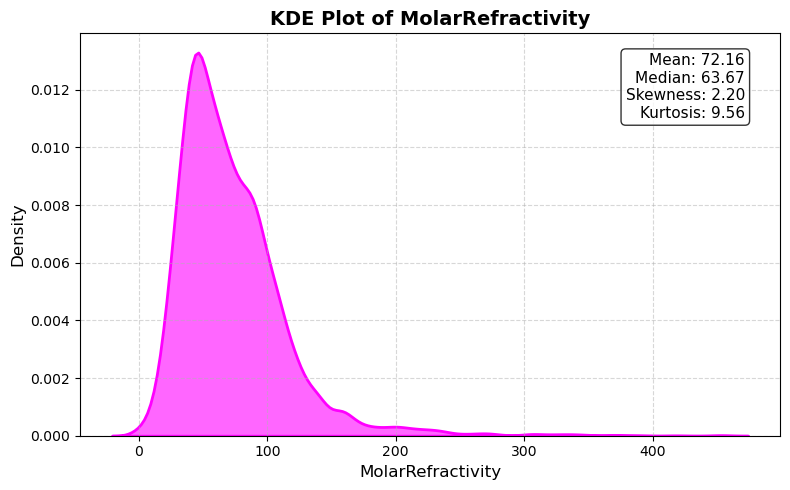

In [78]:
plot_kde_with_stats_and_save(df['MolarRefractivity'], column_name='MolarRefractivity')

Function started
Data cleaned
Stats computed: mean=4.370706167794662, median=4.0, skew=3.793883018262021, kurt=31.310444951823875
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\Heteroatoms_kde_plot.png
Plot saved


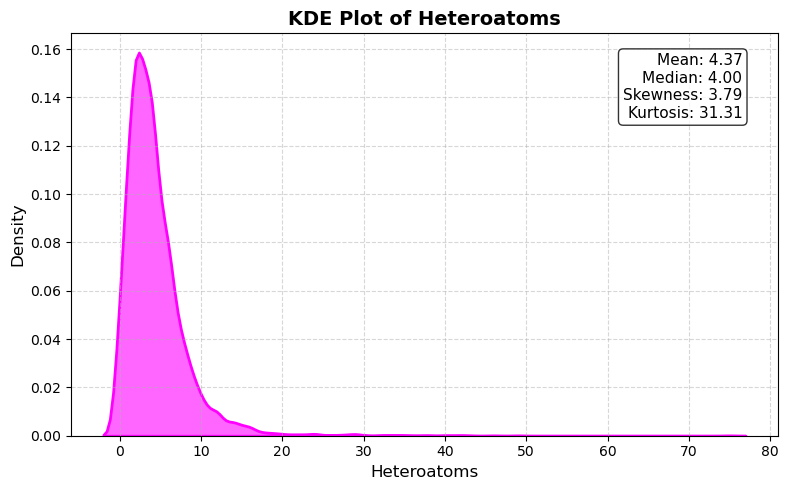

In [79]:
plot_kde_with_stats_and_save(df['Heteroatoms'], column_name='Heteroatoms')

Function started
Data cleaned
Stats computed: mean=0.5640403524454093, median=0.0, skew=5.559325446575675, kurt=51.63175956931893
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\HalogenCount_kde_plot.png
Plot saved


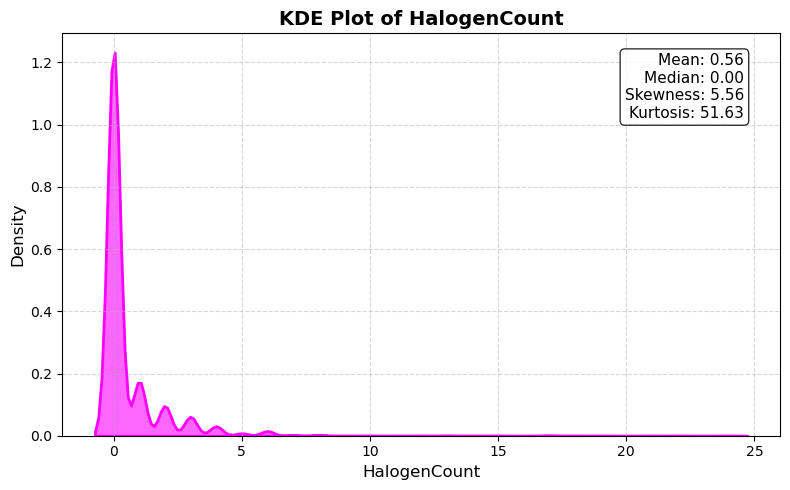

In [80]:
plot_kde_with_stats_and_save(df['HalogenCount'], column_name='HalogenCount')

Function started
Data cleaned
Stats computed: mean=0.14212744221683055, median=0.0, skew=13.813396786022505, kurt=478.7789477533045
Directory ensured: ./Plots/KDEPlots
Saving plot to: ./Plots/KDEPlots\PhenolicGroups_kde_plot.png
Plot saved


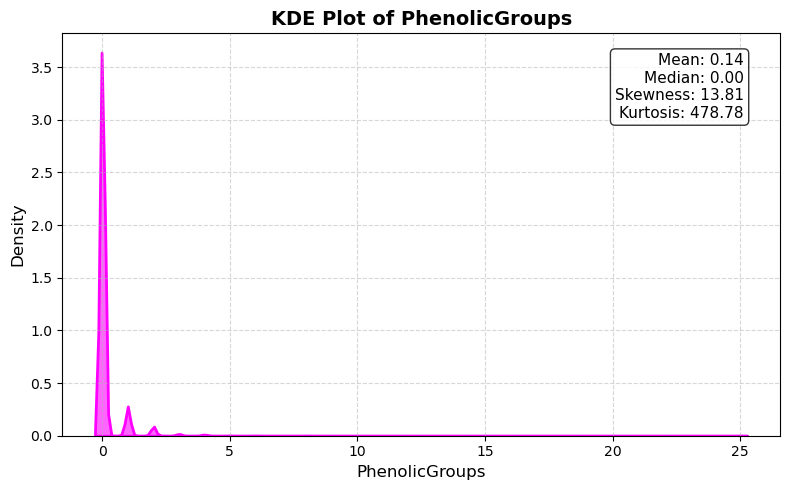

In [81]:
plot_kde_with_stats_and_save(df['PhenolicGroups'], column_name='PhenolicGroups')

### Outlier Analysis using Boxplots

In [85]:
import os

def plot_box_with_quartile_stats_and_save(column, column_name='Column', figsize=(8, 4), save_dir='./Plots/BoxPlots'):
    print("Box plot function started")

    data = pd.Series(column).dropna()
    print("Data cleaned")

    # Quartile statistics
    q1 = np.percentile(data, 25)
    q2 = np.median(data)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    print(f"Quartiles computed: Q1={q1}, Q2={q2}, Q3={q3}, IQR={iqr}")

    # Create horizontal box plot
    plt.figure(figsize=figsize)
    ax = sns.boxplot(x=data, color='orchid', fliersize=5, width=0.5, linewidth=2)

    plt.xlabel(column_name, fontsize=12)
    plt.title(f"Box Plot of {column_name}", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)

    # Annotation box
    stats_text = '\n'.join([
        f"Q1 (25%): {q1:.2f}",
        f"Q2 (Median): {q2:.2f}",
        f"Q3 (75%): {q3:.2f}",
        f"IQR: {iqr:.2f}"
    ])

    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.85))

    plt.tight_layout()

    # Save the plot
    os.makedirs(save_dir, exist_ok=True)
    filename = f"{column_name}_box_plot.png"
    full_path = os.path.join(save_dir, filename)

    print(f"Saving plot to: {full_path}")
    plt.savefig(full_path, dpi=300)
    print("Plot saved")

    plt.show()

Box plot function started
Data cleaned
Quartiles computed: Q1=165.214, Q2=240.302, Q3=343.044, IQR=177.82999999999998
Saving plot to: ./Plots/BoxPlots\Molecular Weight_box_plot.png
Plot saved


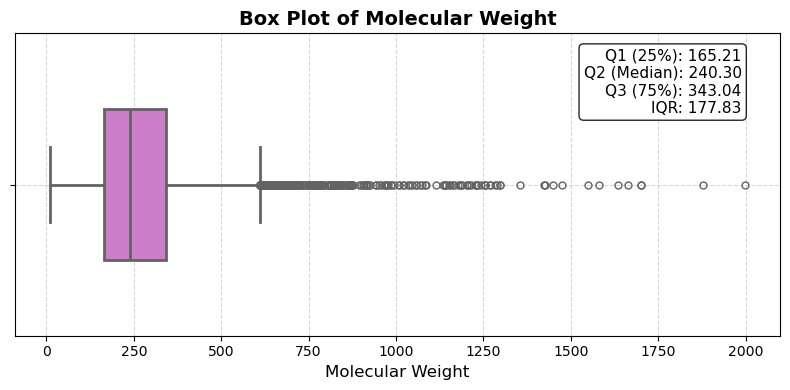

In [86]:
plot_box_with_quartile_stats_and_save(df['MolecularWeight'], column_name='Molecular Weight')

Box plot function started
Data cleaned
Quartiles computed: Q1=1.148000000000001, Q2=2.3651, Q3=3.6524500000000026, IQR=2.5044500000000016
Saving plot to: ./Plots/BoxPlots\LogP_box_plot.png
Plot saved


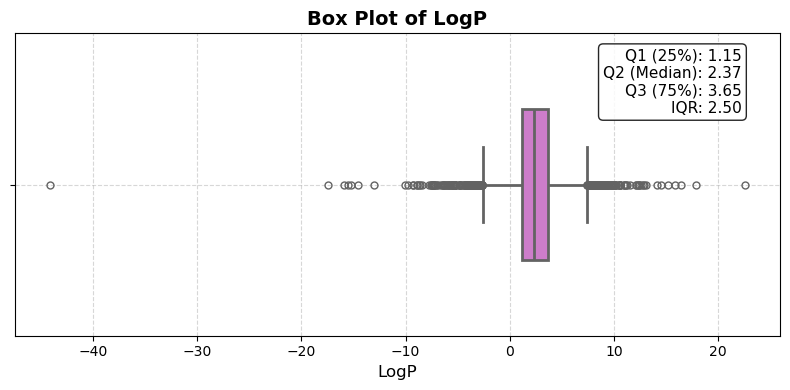

In [90]:
plot_box_with_quartile_stats_and_save(df['LogP'], column_name='LogP')

Box plot function started
Data cleaned
Quartiles computed: Q1=26.3, Q2=46.53, Q3=77.07500000000002, IQR=50.77500000000002
Saving plot to: ./Plots/BoxPlots\TPSA_box_plot.png
Plot saved


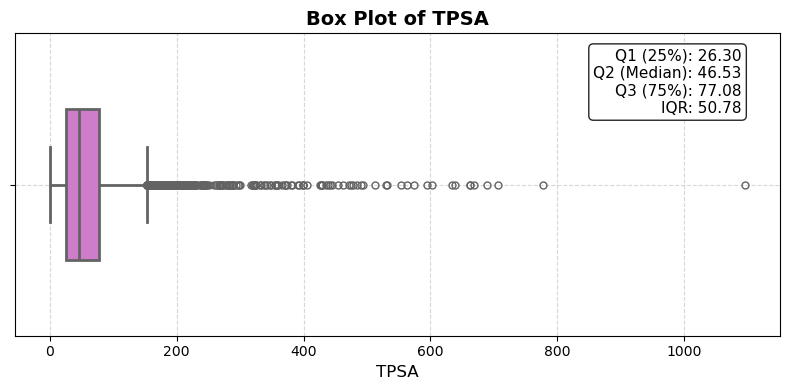

In [91]:
plot_box_with_quartile_stats_and_save(df['TPSA'], column_name='TPSA')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=1.0, Q3=2.0, IQR=2.0
Saving plot to: ./Plots/BoxPlots\HBDonors_box_plot.png
Plot saved


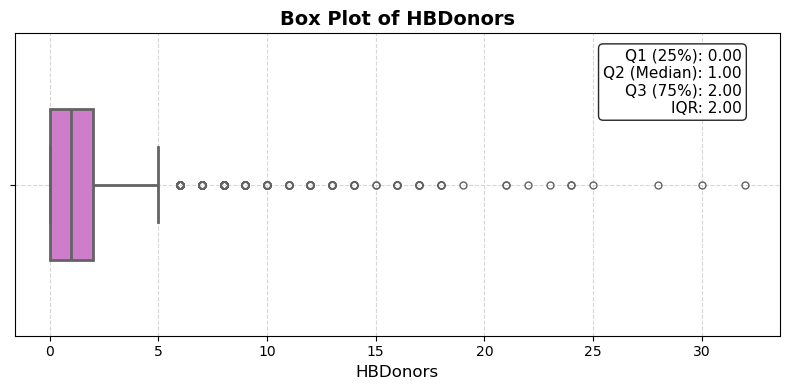

In [93]:
plot_box_with_quartile_stats_and_save(df['HBDonors'], column_name='HBDonors')

Box plot function started
Data cleaned
Quartiles computed: Q1=2.0, Q2=3.0, Q3=5.0, IQR=3.0
Saving plot to: ./Plots/BoxPlots\HBAcceptors_box_plot.png
Plot saved


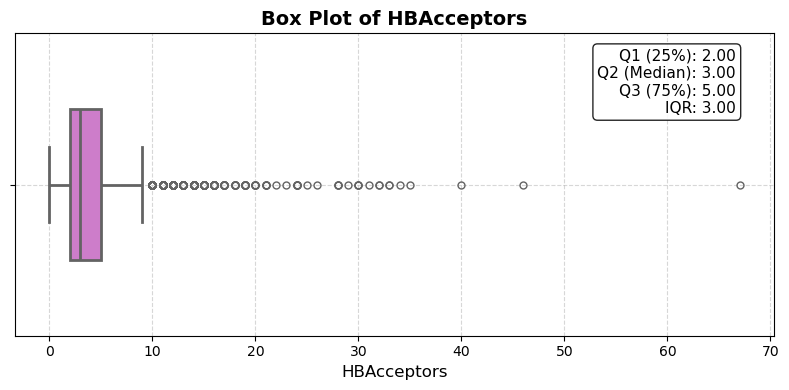

In [94]:
plot_box_with_quartile_stats_and_save(df['HBAcceptors'], column_name='HBAcceptors')

Box plot function started
Data cleaned
Quartiles computed: Q1=1.0, Q2=3.0, Q3=6.0, IQR=5.0
Saving plot to: ./Plots/BoxPlots\RotatableBonds_box_plot.png
Plot saved


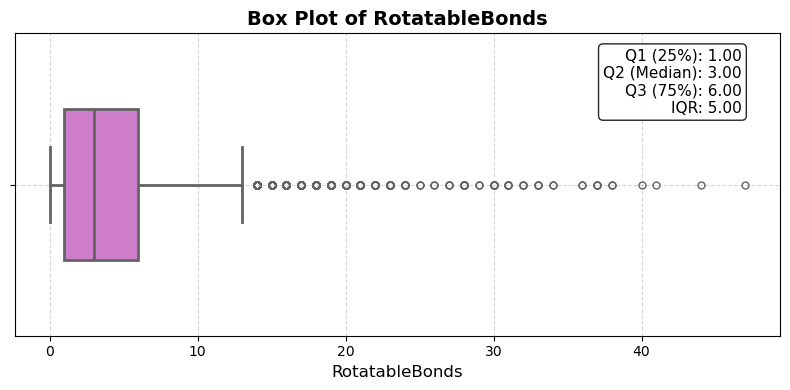

In [95]:
plot_box_with_quartile_stats_and_save(df['RotatableBonds'], column_name='RotatableBonds')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.1818181818181818, Q2=0.4166666666666667, Q3=0.7272727272727273, IQR=0.5454545454545455
Saving plot to: ./Plots/BoxPlots\FractionCSP3_box_plot.png
Plot saved


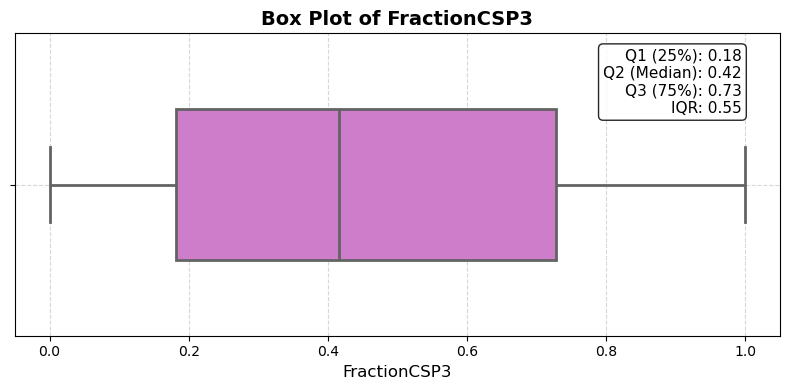

In [96]:
plot_box_with_quartile_stats_and_save(df['FractionCSP3'], column_name='FractionCSP3')

Box plot function started
Data cleaned
Quartiles computed: Q1=11.0, Q2=16.0, Q3=23.0, IQR=12.0
Saving plot to: ./Plots/BoxPlots\HeavyAtoms_box_plot.png
Plot saved


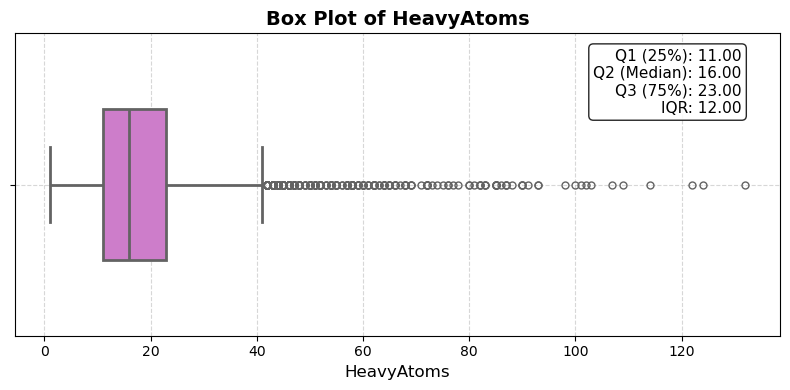

In [98]:
plot_box_with_quartile_stats_and_save(df['HeavyAtoms'], column_name='HeavyAtoms')

Box plot function started
Data cleaned
Quartiles computed: Q1=1.0, Q2=1.0, Q3=3.0, IQR=2.0
Saving plot to: ./Plots/BoxPlots\RingCount_box_plot.png
Plot saved


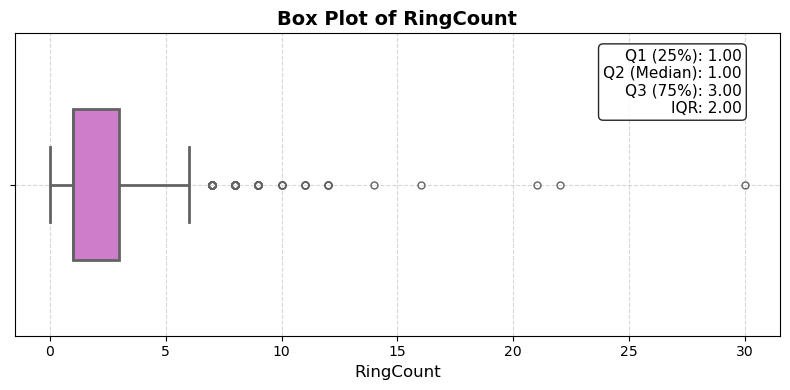

In [99]:
plot_box_with_quartile_stats_and_save(df['RingCount'], column_name='RingCount')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=0.3571428571428571, Q3=0.5454545454545454, IQR=0.5454545454545454
Saving plot to: ./Plots/BoxPlots\AromaticProportion_box_plot.png
Plot saved


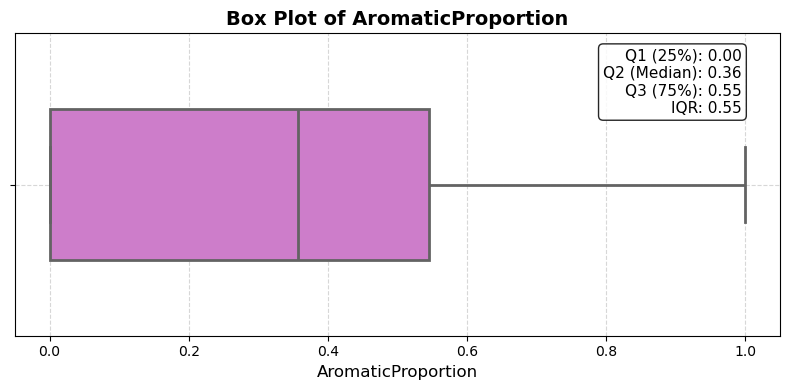

In [100]:
plot_box_with_quartile_stats_and_save(df['AromaticProportion'], column_name='AromaticProportion')

Box plot function started
Data cleaned
Quartiles computed: Q1=-4.1056513909090935, Q2=-2.875236742857143, Q3=-1.8030279636363635, IQR=2.3026234272727297
Saving plot to: ./Plots/BoxPlots\LogS_ESOL_box_plot.png
Plot saved


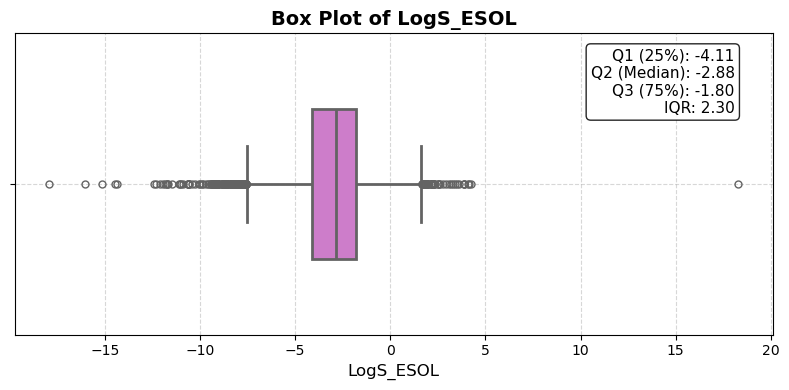

In [101]:
plot_box_with_quartile_stats_and_save(df['LogS_ESOL'], column_name='LogS_ESOL')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=0.0, Q3=0.0, IQR=0.0
Saving plot to: ./Plots/BoxPlots\PositiveChargs_box_plot.png
Plot saved


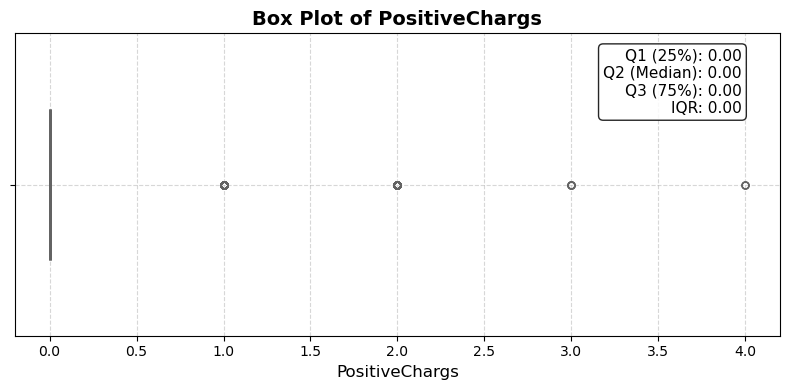

In [102]:
plot_box_with_quartile_stats_and_save(df['PositiveCharges'], column_name='PositiveChargs')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=0.0, Q3=0.0, IQR=0.0
Saving plot to: ./Plots/BoxPlots\NegativeCharges_box_plot.png
Plot saved


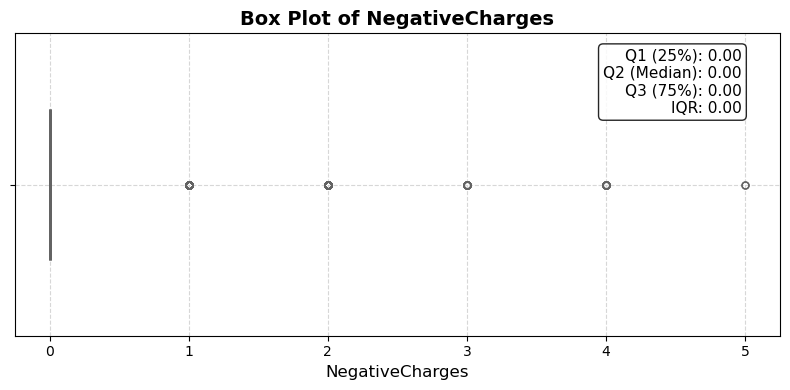

In [103]:
plot_box_with_quartile_stats_and_save(df['NegativeCharges'], column_name='NegativeCharges')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=0.0, Q3=0.0, IQR=0.0
Saving plot to: ./Plots/BoxPlots\FormalCharge_box_plot.png
Plot saved


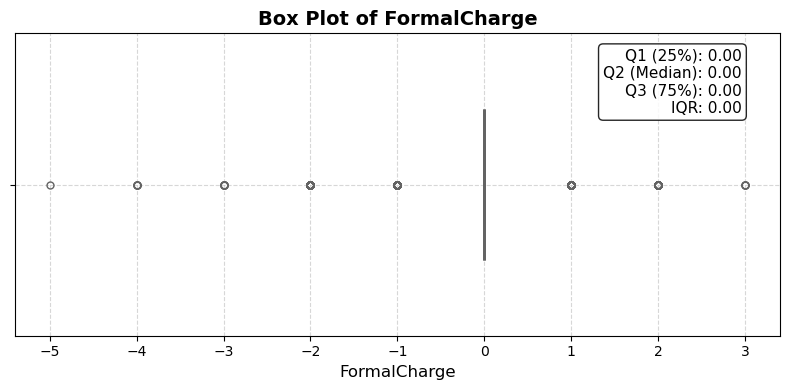

In [104]:
plot_box_with_quartile_stats_and_save(df['FormalCharge'], column_name='FormalCharge')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=1.0, Q3=2.0, IQR=2.0
Saving plot to: ./Plots/BoxPlots\AromaticRings_box_plot.png
Plot saved


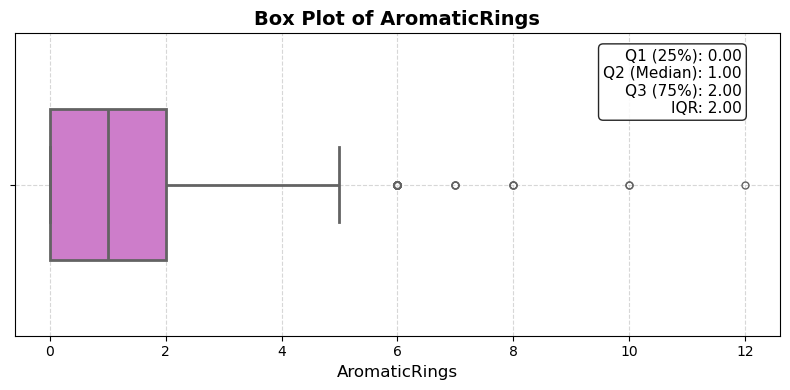

In [105]:
plot_box_with_quartile_stats_and_save(df['AromaticRings'], column_name='AromaticRings')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=0.0, Q3=0.0, IQR=0.0
Saving plot to: ./Plots/BoxPlots\AromaticHeterocycles_box_plot.png
Plot saved


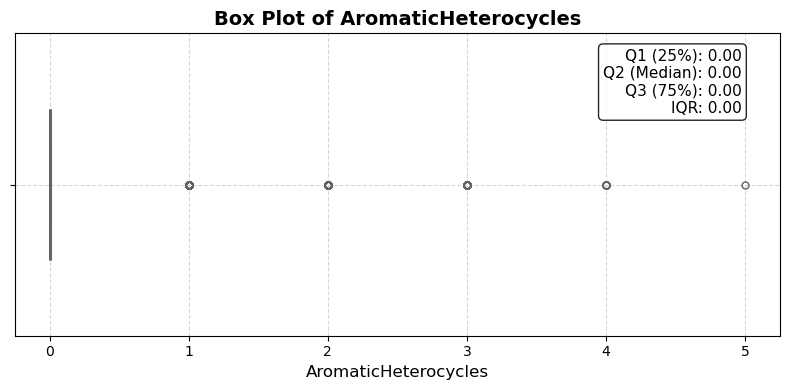

In [106]:
plot_box_with_quartile_stats_and_save(df['AromaticHeterocycles'], column_name='AromaticHeterocycles')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=0.0, Q3=1.0, IQR=1.0
Saving plot to: ./Plots/BoxPlots\AliphaticRings_box_plot.png
Plot saved


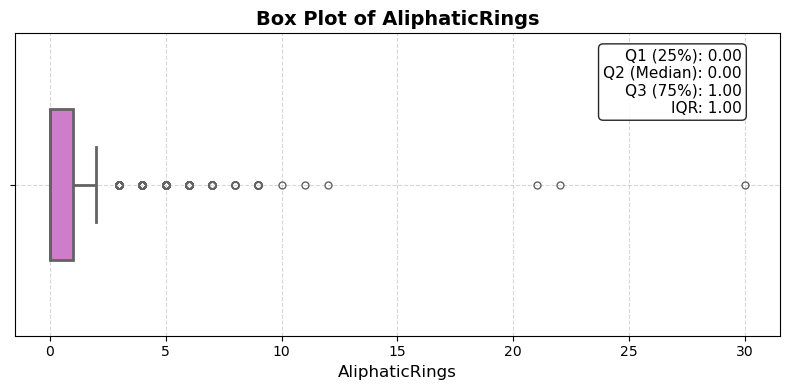

In [107]:
plot_box_with_quartile_stats_and_save(df['AliphaticRings'], column_name='AliphaticRings')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.9090909090909092, Q2=1.1428571428571428, Q3=1.3333333333333333, IQR=0.4242424242424241
Saving plot to: ./Plots/BoxPlots\MolecularComplexity_box_plot.png
Plot saved


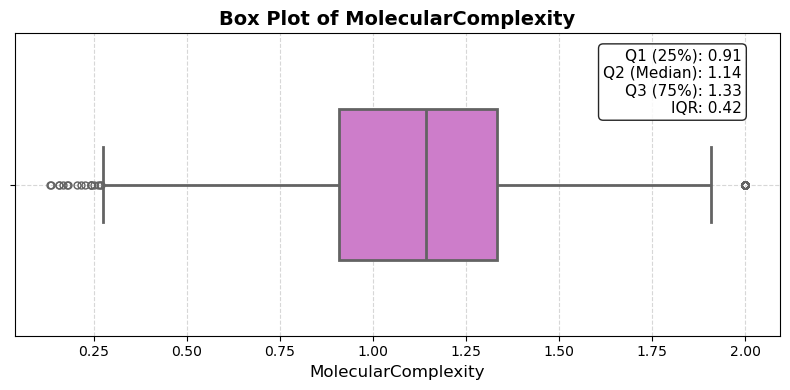

In [108]:
plot_box_with_quartile_stats_and_save(df['MolecularComplexity'], column_name='MolecularComplexity')

Box plot function started
Data cleaned
Quartiles computed: Q1=43.80500000000002, Q2=63.66830000000004, Q3=91.05760000000002, IQR=47.2526
Saving plot to: ./Plots/BoxPlots\MolarRefractivity_box_plot.png
Plot saved


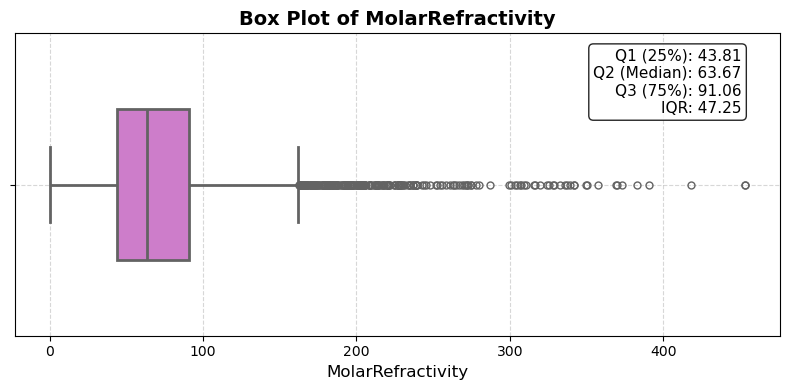

In [109]:
plot_box_with_quartile_stats_and_save(df['MolarRefractivity'], column_name='MolarRefractivity')

Box plot function started
Data cleaned
Quartiles computed: Q1=2.0, Q2=4.0, Q3=6.0, IQR=4.0
Saving plot to: ./Plots/BoxPlots\Heteroatoms_box_plot.png
Plot saved


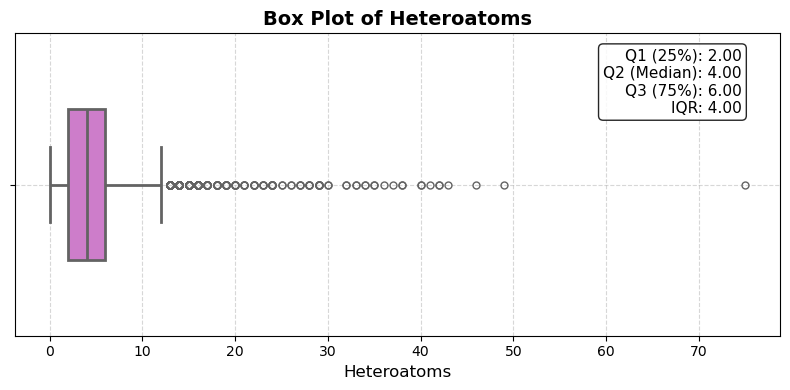

In [110]:
plot_box_with_quartile_stats_and_save(df['Heteroatoms'], column_name='Heteroatoms')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=0.0, Q3=0.0, IQR=0.0
Saving plot to: ./Plots/BoxPlots\HalogenCount_box_plot.png
Plot saved


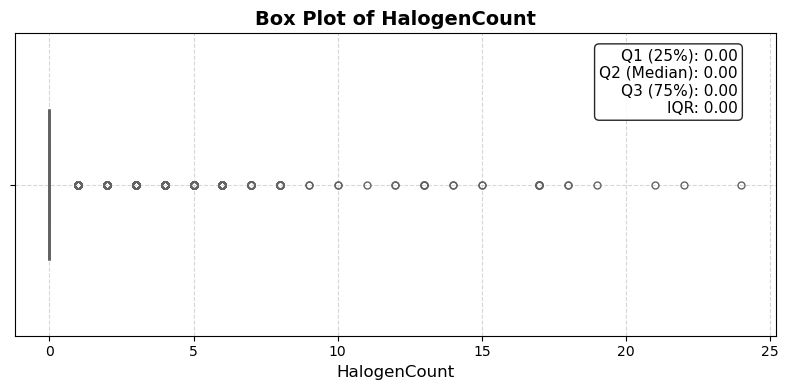

In [111]:
plot_box_with_quartile_stats_and_save(df['HalogenCount'], column_name='HalogenCount')

Box plot function started
Data cleaned
Quartiles computed: Q1=0.0, Q2=0.0, Q3=0.0, IQR=0.0
Saving plot to: ./Plots/BoxPlots\PhenolicGroups_box_plot.png
Plot saved


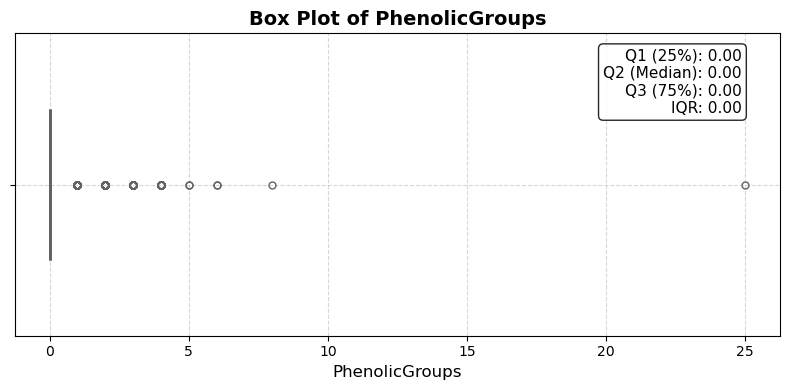

In [112]:
plot_box_with_quartile_stats_and_save(df['PhenolicGroups'], column_name='PhenolicGroups')